In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
import pydicom as dcm
from matplotlib import pyplot as plt
import numpy as np

In [20]:
inception = keras.applications.resnet.ResNet101(include_top=False, input_shape=(256,256,3), weights='imagenet', 
                                                       classes=6)

In [21]:
inception.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

                                                                                                  
 conv4_block15_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block15_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block15_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block15_3_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block15_3_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_blo

In [4]:
len(inception.layers)

345

In [5]:
def get_center_and_width(dicom):
    return tuple([int(x[0]) if type(x) == dcm.multival.MultiValue else int(x) for x in [dicom.WindowCenter, dicom.WindowWidth]])
def normalize_minmax(img):
    mi, ma = img.min(), img.max()
    return (img - mi) / (ma - mi)

def window_filter(img, center, width, slope, intercept):
    out = np.copy(img)
    out = out*slope + intercept
    lowest_visible = center - width//2
    highest_visible = center + width//2
    
    out[out < lowest_visible] = lowest_visible
    out[out > highest_visible] = highest_visible
    return normalize_minmax(out)
def standardize(img):
    m, std = img.mean(), img.std()
    return (img - m) / std


In [6]:
dicom = dcm.dcmread("C:/Users/keena/OneDrive/Documents/GitHub/mec-mini-projects/Capstone Project/ID_0002e8344.dcm")
img = dicom.pixel_array
center, width = get_center_and_width(dicom)
slope, intercept = dicom.RescaleSlope, dicom.RescaleIntercept
orig = window_filter(img, center, width, slope, intercept)

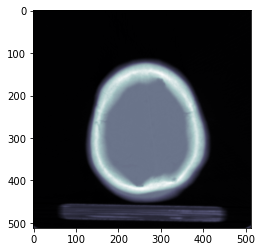

In [7]:
plt.imshow(img, cmap=plt.cm.bone)

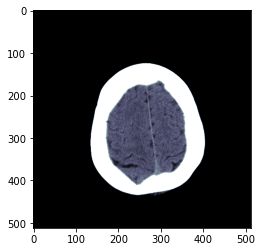

In [8]:
brain = window_filter(img, 40, 80, slope, intercept)
plt.imshow(brain, cmap=plt.cm.bone)

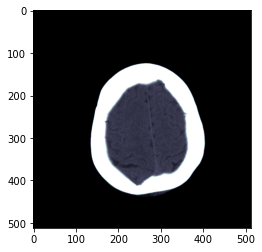

In [9]:
subdural = window_filter(img, 80, 200, slope, intercept)
plt.imshow(subdural, cmap=plt.cm.bone)

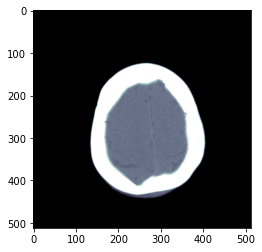

In [10]:
tissue = window_filter(img, 40, 380, slope, intercept)
plt.imshow(tissue, cmap=plt.cm.bone)

In [11]:
channels = np.stack([brain, subdural, tissue], axis=2)
channels.shape

(512, 512, 3)

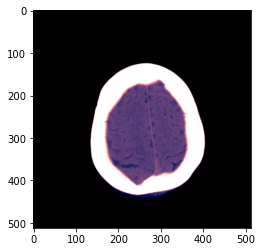

In [12]:
plt.imshow(channels)

In [13]:
data = np.expand_dims(channels, 0)
inception.trainable = True
for layer in inception.layers:
    layer.trainable = True

In [15]:
model = keras.Sequential([inception,  
                          GlobalAveragePooling2D(),
                          Dense(6, activation='softmax')])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 16, 16, 2048)      42658176  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 42,670,470
Trainable params: 42,565,126
Non-trainable params: 105,344
_________________________________________________________________


In [17]:
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [18]:
model.predict(data)

array([[0.13059388, 0.12548104, 0.18307275, 0.13358532, 0.0816126 ,
        0.34565446]], dtype=float32)

In [ ]:
x = np.array([True, False, True, True, False], dtype=bool)

In [ ]:
x.astype(np.int8)

In [19]:
m = keras.applications.resnet.ResNet101(include_top=True, weights='imagenet')
m.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

 on)                                                                                              
                                                                                                  
 conv4_block14_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block14_1_relu[0][0]']   
                                                                                                  
 conv4_block14_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block14_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block14_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block14_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo